# This is a test project to calculate approximate closig value of an index based on Open, High and Medium
The model is to be trained based on last 3 year's data
and evaluated on last 3 month's data
the success criteria will be a score of 90%

## Model to be used
we will use Lasso model for this problem

## Import Training Data (from last 3 years)
Note:
* verified that there are no null values in the data (As the dataset is small, it can be validated in the file directly)
* Verified that all the rwos contain non-zero values
* no strings, all values are numerical and hence no data manipluation is needed
  

In [38]:
import pandas as pd
training_data=pd.read_csv("TrainandVal.csv")
training_data

,Date,Open,High,Low,Close
0,1-Jan-20,12262.19,12289.86,12234.08,12251.58
1,2-Jan-20,12263.86,12363.88,12260.32,12357.77
2,3-Jan-20,12358.37,12358.79,12268.84,12302.38
3,6-Jan-20,12276.04,12276.04,12044.04,12061.12
4,7-Jan-20,12148.75,12228.28,12078.65,12121.53
...,...,...,...,...,...
1049,20-Mar-24,22653.00,22733.11,22493.07,22658.79
1050,21-Mar-24,22813.35,22934.83,22800.53,22899.90
1051,26-Mar-24,22887.78,23003.42,22868.58,22962.80
1052,27-Mar-24,23044.76,23145.46,23022.09,23067.59


### Remove the date column 

In [39]:
training_data=training_data.drop("Date",axis=1)

In [40]:
training_data

,Open,High,Low,Close
0,12262.19,12289.86,12234.08,12251.58
1,12263.86,12363.88,12260.32,12357.77
2,12358.37,12358.79,12268.84,12302.38
3,12276.04,12276.04,12044.04,12061.12
4,12148.75,12228.28,12078.65,12121.53
...,...,...,...,...
1049,22653.00,22733.11,22493.07,22658.79
1050,22813.35,22934.83,22800.53,22899.90
1051,22887.78,23003.42,22868.58,22962.80
1052,23044.76,23145.46,23022.09,23067.59


### Setup the training and validation data
We will use the 20% of the data to validate the trained modal

In [41]:
x=training_data.drop("Close",axis=1)
y=training_data["Close"]

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
x_train, x_test,y_train,y_test=train_test_split(x,
                                                y,
                                                test_size=0.2)

In [44]:
from sklearn import linear_model


In [45]:
model =linear_model.Lasso(alpha=0.1)

In [46]:
model.fit(x_train,y_train)

C:\Users\91942\Desktop\Learn2\ML Projects\StockML\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.358e+06, tolerance: 1.033e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [47]:
model.score(x_train,y_train)

0.9993500376651336

In [48]:
model.score(x_test,y_test)

0.9991463113237713

In [49]:
future_data=pd.read_csv("TestSet.csv")


In [50]:
future_data.head()

,Date,Open,High,Low,Close
0,1-Apr-24,23413.27,23508.65,23411.47,23452.17
1,2-Apr-24,23483.43,23507.83,23406.23,23482.86
2,3-Apr-24,23455.04,23557.22,23381.05,23476.12
3,4-Apr-24,23644.61,23664.65,23368.19,23536.04
4,5-Apr-24,23559.17,23586.00,23463.76,23559.35


In [51]:
future_temp=future_data.drop("Date",axis=1)

In [52]:
future_x=future_temp.drop("Close",axis=1)
future_y=future_temp["Close"]

In [53]:
fpredict=model.predict(future_x)
fpredict

array([23447.37164162, 23466.21597374, 23475.28444026, 23578.30275203,
       23538.90016657, 23686.65340829, 23781.17197669, 23794.81869937,
       23754.57079598, 23337.28972912, 23220.00141771, 23286.44582864,
       23028.66286974, 23370.5863302 , 23491.22213902, 23517.07212914,
       23556.24726706, 23665.79710166, 23695.04320491, 23858.61500193,
       23818.05744132, 23880.00881237, 23736.69482323, 23590.02995723,
       23432.94777559, 23413.62974107, 23208.81409107, 23208.09569067,
       23379.71217215, 23482.19465053, 23546.08094542, 23707.01021189,
       23806.42406795, 23831.37290523, 23899.51903349, 24093.25960545,
       24268.07807374, 24321.96983014, 24257.49404659, 24047.73492444,
       23886.25297384, 23828.05987681, 24579.4448387 , 24006.96798156,
       23521.98015872, 24128.42457247, 24354.19137459, 24686.29359877,
       24665.81072425, 24723.55281998, 24826.79835827, 24864.05392986,
       25009.0984035 , 25046.00335566, 25002.34535542, 25043.87351718,
      

In [54]:
len(future_y), len(fpredict)

(60, 60)

In [55]:
future_data.head()

,Date,Open,High,Low,Close
0,1-Apr-24,23413.27,23508.65,23411.47,23452.17
1,2-Apr-24,23483.43,23507.83,23406.23,23482.86
2,3-Apr-24,23455.04,23557.22,23381.05,23476.12
3,4-Apr-24,23644.61,23664.65,23368.19,23536.04
4,5-Apr-24,23559.17,23586.00,23463.76,23559.35


In [56]:
future_data["Predicted Value"]=fpredict

In [57]:
future_data["difference"]=future_data["Predicted Value"]-future_data["Close"]
future_data

,Date,Open,High,Low,Close,Predicted Value,difference
0,1-Apr-24,23413.27,23508.65,23411.47,23452.17,23447.371642,-4.798358
1,2-Apr-24,23483.43,23507.83,23406.23,23482.86,23466.215974,-16.644026
2,3-Apr-24,23455.04,23557.22,23381.05,23476.12,23475.284440,-0.835560
3,4-Apr-24,23644.61,23664.65,23368.19,23536.04,23578.302752,42.262752
4,5-Apr-24,23559.17,23586.00,23463.76,23559.35,23538.900167,-20.449833
5,8-Apr-24,23670.55,23756.31,23610.37,23714.31,23686.653408,-27.656592
6,9-Apr-24,23834.01,23834.01,23652.97,23692.95,23781.171977,88.221977
7,10-Apr-24,23786.55,23847.31,23742.35,23827.44,23794.818699,-32.621301
8,12-Apr-24,23801.77,23824.13,23600.20,23611.21,23754.570796,143.360796
9,15-Apr-24,23214.96,23496.87,23214.96,23334.16,23337.289729,3.129729


## Let us try with LassoLarsIC modal

we will also perform cross-validation


In [58]:
import time

from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(x, y)
fit_time = time.time() - start_time

In [59]:
fit_time

0.3255338668823242

In [60]:
lasso_lars_ic.score(x_train,y_train)

0.9998037189834369

In [61]:
lasso_lars_ic.score(x_test,y_test)

0.9997702820690592

In [62]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [64]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(x, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

In [65]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
3506.164619,5180834.644752,5180834.644752
3127.143451,4124011.963483,4124016.923831
0.540905,12394.122450,12404.043145
0.000000,11242.800782,11257.681825


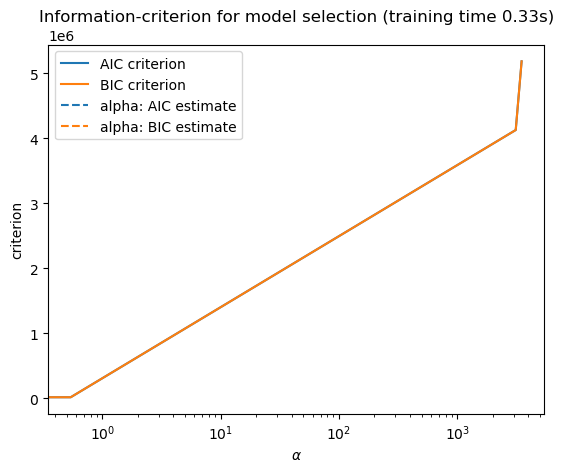

In [66]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

# Hyperparameter Tuning using LassoLars CV

In [69]:
from sklearn.linear_model import LassoLarsCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoLarsCV(cv=20)).fit(x, y)
fit_time = time.time() - start_time

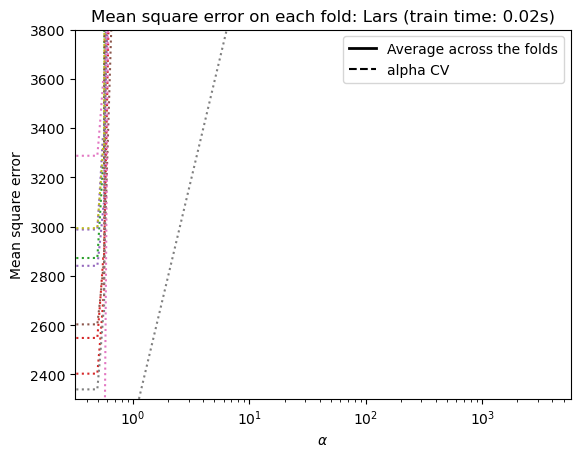

In [74]:
import matplotlib.pyplot as plt

ymin, ymax = 2300, 3800
lasso = model[-1]
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars (train time: {fit_time:.2f}s)")